**Modeling:** This part sets up the structure of the analysis. I assign a treatment based on whether the price is above or below the cutoff of $12.

If the price is greater than or equal to $12, the treatment is 1, indicating a price increase; otherwise, it's 0. The outcome of interest is subscriber retention, which is modeled as a function of the price, treatment, and their interaction. This structure explores the causal impact of the price increase on retention.

In [ ]:
!pip install numpy pandas matplotlib seaborn statsmodels

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols

**Identification:** By using the cutoff at $12, I assume that individuals just above and below the threshold are similar, except for the treatment. This isolates the effect of the price increase on retention. The cutoff helps to identify the treatment effect by comparing retention between the two groups (those who experienced the price increase vs. those who didn’t).

In [ ]:
# Simulating a dataset
np.random.seed(42)
n = 1000

price = np.random.uniform(8, 15, n)
cutoff = 12

treatment = (price >= cutoff).astype(int)

retention = 0.8 - 0.05 * (price - cutoff) + 0.1 * treatment + np.random.normal(0, 0.05, n)

df = pd.DataFrame({'price': price, 'treatment': treatment, 'retention': retention})

**Estimation:** The causal effect of the price increase on retention is estimated in this step. First, I fit an OLS regression model, where price, treatment, and their interaction term are included. This regression provides the coefficients that quantify the effect of the treatment (price increase) on retention. The estimated coefficients explain how the change in price influences subscriber retention, controlling for other factors.

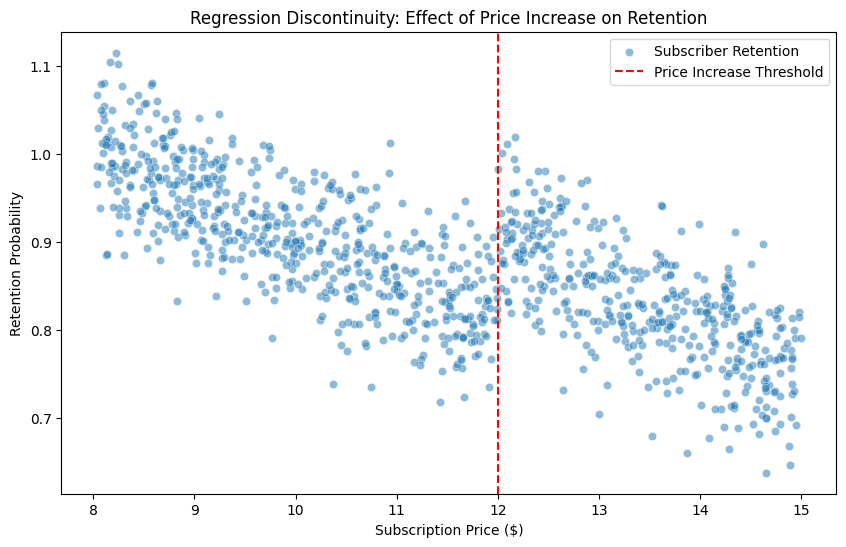

                            OLS Regression Results                            
Dep. Variable:              retention   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.649
Method:                 Least Squares   F-statistic:                     616.1
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          2.33e-226
Time:                        12:21:54   Log-Likelihood:                 1591.1
No. Observations:                1000   AIC:                            -3174.
Df Residuals:                     996   BIC:                            -3155.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.3980      0.018     79.106      

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['price'], y=df['retention'], alpha=0.5, label="Subscriber Retention")
plt.axvline(x=cutoff, color='red', linestyle='--', label="Price Increase Threshold")
plt.xlabel("Subscription Price ($)")
plt.ylabel("Retention Probability")
plt.title("Regression Discontinuity: Effect of Price Increase on Retention")
plt.legend()
plt.show()

df['interaction'] = df['price'] * df['treatment']
model = ols('retention ~ price + treatment + interaction', data=df).fit()

print(model.summary())

**Refutation:** To ensure the validity of these findings, a refutation test is performed by shifting the cutoff to $10, an arbitrary value. This placebo test checks whether the observed treatment effect is robust and not due to random chance. If a significant effect at the new cutoff is found, it would suggest that the initial results might not be due to the price increase but rather to other factors, strengthening the credibility of the original findings.

In [ ]:
placebo_cutoff = 10
df['placebo_treatment'] = (df['price'] >= placebo_cutoff).astype(int)
df['placebo_interaction'] = df['price'] * df['placebo_treatment']

placebo_model = ols('retention ~ price + placebo_treatment + placebo_interaction', data=df).fit()
print("\nPlacebo Test Results (Cutoff at $10 instead of $12):")
print(placebo_model.summary())


Placebo Test Results (Cutoff at $10 instead of $12):
                            OLS Regression Results                            
Dep. Variable:              retention   R-squared:                       0.578
Model:                            OLS   Adj. R-squared:                  0.577
Method:                 Least Squares   F-statistic:                     454.6
Date:                Sun, 23 Feb 2025   Prob (F-statistic):          5.26e-186
Time:                        12:22:00   Log-Likelihood:                 1497.8
No. Observations:                1000   AIC:                            -2988.
Df Residuals:                     996   BIC:                            -2968.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------